Soubor X - 011.txt
Soubor Y - 007.txt

In [123]:
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [124]:
# Load files
pathX = "./inputs/011.txt"
pathY = "./inputs/007.txt"
x = open(pathX).readlines()[1:][0].replace(" ", "␣")
y = open(pathY).readlines()[1:][0].replace(" ", "␣")

lx = len(x)
ly = len(y)

countX = Counter(x)
countY = Counter(y)

print(lx)
print(ly)

6123
5833


In [125]:
def calc_probabilities(counts, text_len):
    probabilities = {}
    for c in counts.keys():
        probability = counts[c] / text_len
        probabilities[c] = probability
    return probabilities


In [126]:
def sort_dict_value(dict_to_sort):
    return dict(sorted(dict_to_sort.items(), key=lambda item: item[1], reverse=True))


In [127]:
def draw_pst_plot(counts, text_len, caption):
    probabilities = calc_probabilities(counts, text_len)
    sorted_probabilities = sort_dict_value(probabilities)
    plt.bar(range(len(sorted_probabilities)), list(
        sorted_probabilities.values()), align='center')
    plt.xticks(range(len(sorted_probabilities)),
               list(sorted_probabilities.keys()))
    plt.suptitle(caption)
    plt.show()
    


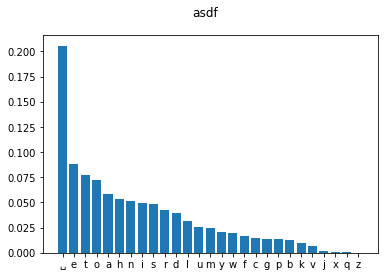

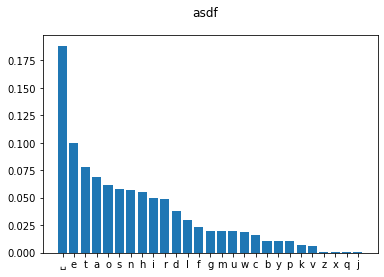

In [128]:
draw_pst_plot(countX, lx, "asdf")
draw_pst_plot(countY, ly, "asdf")

In [129]:
def calc_entropy(counts, text_len):
    entropy = 0
    for c in counts.keys():
        probability = counts[c] / text_len
        entropy += (- (probability * math.log2(probability)))
    return entropy

In [130]:
hx = calc_entropy(countX, lx)
hy = calc_entropy(countY, ly)

print(hx)
print(hy)

4.0639057100402844
4.05314575306802


In [131]:
class NodeTree(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return (self.left, self.right)

    def nodes(self):
        return (self.left, self.right)

    def __repr__(self):
        return '%s_%s' % (self.left, self.right)


def huffman_code_tree(node, left=True, binString=''):
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, True, binString + '0'))
    d.update(huffman_code_tree(r, False, binString + '1'))
    return d


def get_encoding(counts):
    nodes = counts.most_common()[::-1]

    while len(nodes) > 1:
        (key1, c1) = nodes[-1]
        (key2, c2) = nodes[-2]
        nodes = nodes[:-2]
        node = NodeTree(key1, key2)
        nodes.append((node, c1 + c2))

        nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    huffmanCode = huffman_code_tree(nodes[0][0])
    return huffmanCode

def print_huffman_code(counts, code):
    print(' Char | Huffman code ')
    print('----------------------')
    for (char, _) in counts.most_common()[::-1]:
        print(' %-4r |%12s' % (char, code[char]))

code = get_encoding(countX)
codeY = get_encoding(countY)
print_huffman_code(countX, code)


 Char | Huffman code 
----------------------
 'z'  | 11111110000
 'q'  | 11111110001
 'x'  |  1111111001
 'j'  |   111111101
 'v'  |    11111111
 'k'  |     1111110
 'b'  |      011000
 'p'  |      011001
 'g'  |      011010
 'c'  |      011011
 'f'  |      110010
 'w'  |      110011
 'y'  |      111110
 'm'  |       00110
 'u'  |       00111
 'l'  |       11000
 'd'  |       11110
 'r'  |        0000
 's'  |        0001
 'i'  |        0010
 'n'  |        0100
 'h'  |        0101
 'a'  |        0111
 'o'  |        1101
 't'  |        1110
 'e'  |         101
 '␣'  |         100


In [132]:
def calc_mean_length(probabilities, code):
    res = 0
    for char in probabilities:
        res += probabilities[char] * len(code[char])
    return res

In [133]:
probabsX = calc_probabilities(countX, lx)
probabsY = calc_probabilities(countY, ly)
lcx = calc_mean_length(probabsX, code)
lcy = calc_mean_length(probabsY, code)
lcy2 = calc_mean_length(probabsY, codeY)


In [134]:
print(hx)
print(lcx)
print("-----")
print(hy)
print(lcy)
print(lcy2)

4.0639057100402844
4.127388535031847
-----
4.05314575306802
4.103205897479856
4.098062746442653
